# Import all the required Libraries and Methods

In [1]:
#loading classes and packages
import pandas as pd
import numpy as np
import seaborn as sns
import shapely
import plotly.graph_objects as go
import plotly.express as px
color_pal=sns.color_palette()
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from math import sqrt
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from xgboost import DMatrix
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder


## Loading Dataset

In [2]:
weather = pd.read_csv('Weather.csv')
weather

,country_x,native_name,iso2,iso3,population,area,capital,capital_lat,capital_lng,region,...,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
0,Afghanistan,افغانستان,AF,AFG,26023100.0,652230.0,Kabul,34.526011,69.177684,Southern and Central Asia,...,12.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,افغانستان,AF,AFG,26023100.0,652230.0,Kabul,34.526011,69.177684,Southern and Central Asia,...,8.2,3.0,17.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,افغانستان,AF,AFG,26023100.0,652230.0,Kabul,34.526011,69.177684,Southern and Central Asia,...,5.4,NaN,8.5,25.7,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,افغانستان,AF,AFG,26023100.0,652230.0,Kabul,34.526011,69.177684,Southern and Central Asia,...,25.9,18.1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,افغانستان,AF,AFG,26023100.0,652230.0,Kabul,34.526011,69.177684,Southern and Central Asia,...,12.4,5.6,19.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50690,Zimbabwe,Zimbabwe,ZW,ZWE,13061239.0,390757.0,Harare,-17.831773,31.045686,Eastern Africa,...,NaN,16.6,30.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN
50691,Zimbabwe,Zimbabwe,ZW,ZWE,13061239.0,390757.0,Harare,-17.831773,31.045686,Eastern Africa,...,19.0,14.5,23.3,3.0,NaN,NaN,NaN,NaN,NaN,NaN
50692,Zimbabwe,Zimbabwe,ZW,ZWE,13061239.0,390757.0,Harare,-17.831773,31.045686,Eastern Africa,...,NaN,4.6,26.8,0.0,NaN,NaN,NaN,NaN,NaN,NaN
50693,Zimbabwe,Zimbabwe,ZW,ZWE,13061239.0,390757.0,Harare,-17.831773,31.045686,Eastern Africa,...,13.0,2.2,18.9,0.3,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
weather.describe()

,population,area,capital_lat,capital_lng,latitude,longitude,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
count,4.980700e+04,5.040000e+04,50551.000000,50551.000000,50695.000000,50695.000000,39186.000000,40232.000000,40526.000000,38702.000000,6387.000000,6394.000000,9764.000000,2060.000000,7428.000000,1888.000000
mean,1.332631e+08,3.103302e+06,28.508285,22.899903,28.051013,23.909099,15.718570,9.953539,20.165259,2.713178,86.894630,184.841101,12.532681,37.947233,1014.997240,355.237818
std,2.933153e+08,5.177411e+06,25.874801,61.359058,26.016675,65.085954,12.021833,11.597173,12.474395,9.579809,377.217203,104.330023,7.024644,18.027725,7.937033,282.964691
min,3.000000e+01,2.020000e+00,-54.283545,-176.174022,-54.790003,-176.174022,-58.700000,-61.200000,-52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,972.700000,0.000000
25%,9.737521e+06,2.383910e+05,13.524834,-1.527094,12.450414,-1.909972,8.300000,2.700000,12.000000,0.000000,0.000000,91.000000,7.500000,25.900000,1010.300000,54.000000
50%,3.870000e+07,6.037000e+05,38.894986,27.478222,37.129761,25.607160,17.800000,11.100000,22.200000,0.000000,0.000000,195.000000,11.100000,35.300000,1014.700000,348.000000
75%,1.197132e+08,2.724900e+06,48.208354,58.387426,47.369997,67.770013,25.700000,19.400000,30.300000,1.100000,20.000000,271.000000,15.900000,46.100000,1019.700000,605.000000
max,1.367110e+09,1.712444e+07,78.223156,179.118650,78.216684,179.216647,43.300000,36.000000,58.000000,482.100000,7140.000000,360.000000,67.600000,226.800000,1050.800000,930.000000


# Total Missing values in the dataset 

In [4]:
weather.isnull().sum()

country_x                     0
native_name                 106
iso2                        209
iso3                          0
population                  888
area                        295
capital                     144
capital_lat                 144
capital_lng                 144
region                      817
continent                   711
station_id_x                  0
city_name                    25
country_y                     0
state                      1120
latitude                      0
longitude                     0
station_id_y                  0
date                          0
season                        0
avg_temp_c                11509
min_temp_c                10463
max_temp_c                10169
precipitation_mm          11993
snow_depth_mm             44308
avg_wind_dir_deg          44301
avg_wind_speed_kmh        40931
peak_wind_gust_kmh        48635
avg_sea_level_pres_hpa    43267
sunshine_total_min        48807
dtype: int64

## Replacing missing values in native_name with country_x using Lambda function.

In [5]:
weather['native_name'] = weather.apply(lambda row: row['country_x'] if pd.isnull(row['native_name']) else row['native_name'], axis=1)

## using Lambda function, replace missing values in ISO2 with ISO3.

In [6]:
weather['iso2'] = weather.apply(lambda row: row['iso3'] if pd.isnull(row['iso2']) else row['iso2'], axis=1)

## Replacing missing vlaues in population using mean.

In [7]:
Total_population = weather['population'].mean()
weather['population'].fillna(Total_population, inplace=True)

## Replacing missing values in area with mean.

In [8]:
mean_area = weather['area'].mean()
weather['area'].fillna(mean_area, inplace=True)

## Replacing missing vlaues in capital using lambda.

In [9]:
weather['capital'] = weather.apply(lambda row: row['country_x'] if pd.isnull(row['capital']) else row['capital'], axis=1)

## Replacing missing values in capital_lat using mean.

In [10]:
mean_capital_lat = weather['capital_lat'].mean()
weather['capital_lat'].fillna(mean_capital_lat, inplace=True)

## Replacing missing values in capital_lng using mean.

In [11]:
mean_capital_lng = weather['capital_lng'].mean()
weather['capital_lng'].fillna(mean_capital_lng, inplace=True)

## Replacing missing values in region with country_y using lambda function.

In [12]:
weather['region'] = weather.apply(lambda row: row['country_y'] if pd.isnull(row['region']) else row['region'], axis=1)

## Replacing missing values in continent with country_y using lambda function.

In [13]:
weather['continent'] = weather.apply(lambda row: row['country_y'] if pd.isnull(row['continent']) else row['continent'], axis=1)

## Replacing missing values in city_name with country_x using lambda function.

In [14]:
weather['city_name'] = weather.apply(lambda row: row['country_x'] if pd.isnull(row['city_name']) else row['city_name'], axis=1)

## Replacing missing values in state with iso3 using lambda function.

In [15]:
weather['state'] = weather.apply(lambda row: row['iso3'] if pd.isnull(row['state']) else row['state'], axis=1)

## Replacing missing values in mean_avg_temp using mean.

In [16]:
mean_avg_temp = weather['avg_temp_c'].mean()
weather['avg_temp_c'].fillna(mean_avg_temp, inplace=True)

## Replacing missing values in min_temp using mean.

In [17]:
min_temp = weather['min_temp_c'].mean()
weather['min_temp_c'].fillna(min_temp, inplace=True)

## Replacing max_temp_c values using interpolate.

In [18]:
weather['max_temp_c'].interpolate(method='linear', inplace=True)

## Replacing precipitation_mm values using interpolate.

In [19]:
weather['precipitation_mm'].interpolate(method='ffill', inplace=True)

## Replacing snow_depth_mm missing values

In [20]:
weather['snow_depth_mm'] = pd.to_numeric(weather['snow_depth_mm'], errors='coerce')
weather['snow_depth_mm'].fillna(0, inplace=True)
df1 = weather.groupby('country_x')['snow_depth_mm'].mean().sort_values(ascending=False).nlargest(20).reset_index()

## Replacing avg_wind_dir_deg missing values using mean.

In [21]:
avg_wind_dir = weather['avg_wind_dir_deg'].mean()
weather['avg_wind_dir_deg'].fillna(avg_wind_dir, inplace=True)

## Replacing avg_wind_speed_kmh using mean.

In [22]:
avg_wind_speed = weather['avg_wind_speed_kmh'].mean()
weather['avg_wind_speed_kmh'].fillna(avg_wind_speed, inplace=True)

## Replacing peak_wind_guest_kmh using median.

In [23]:
peak_wind = weather['peak_wind_gust_kmh'].median()
weather['peak_wind_gust_kmh'].fillna(peak_wind, inplace = True)

## Replacing avg_sea_level_hpa using mean.

In [24]:
avg_sea_level=weather['avg_sea_level_pres_hpa'].mean()
weather['avg_sea_level_pres_hpa'].fillna(avg_sea_level, inplace=True)

## Replacing sunshine_total_min using mean.

In [25]:
sunshine = weather['sunshine_total_min'].mean()
weather['sunshine_total_min'].fillna(sunshine, inplace = True)

## Check again if there any missing values left

In [26]:
weather.isnull().sum()

country_x                 0
native_name               0
iso2                      0
iso3                      0
population                0
area                      0
capital                   0
capital_lat               0
capital_lng               0
region                    0
continent                 0
station_id_x              0
city_name                 0
country_y                 0
state                     0
latitude                  0
longitude                 0
station_id_y              0
date                      0
season                    0
avg_temp_c                0
min_temp_c                0
max_temp_c                1
precipitation_mm          1
snow_depth_mm             0
avg_wind_dir_deg          0
avg_wind_speed_kmh        0
peak_wind_gust_kmh        0
avg_sea_level_pres_hpa    0
sunshine_total_min        0
dtype: int64

In [27]:
weather.describe()

,population,area,capital_lat,capital_lng,latitude,longitude,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
count,5.069500e+04,5.069500e+04,50695.000000,50695.000000,50695.000000,50695.000000,50695.000000,50695.000000,50694.000000,50694.000000,50695.000000,50695.000000,50695.000000,50695.000000,50695.000000,50695.000000
mean,1.332631e+08,3.103302e+06,28.508285,22.899903,28.051013,23.909099,15.718570,9.953539,20.795329,2.856796,10.947746,184.841101,12.532681,35.407571,1014.997240,355.237818
std,2.907350e+08,5.162325e+06,25.838025,61.271849,26.016675,65.085954,10.569449,10.331284,12.165957,9.749858,136.953662,37.049587,3.082746,3.670618,3.037992,54.593372
min,3.000000e+01,2.020000e+00,-54.283545,-176.174022,-54.790003,-176.174022,-58.700000,-61.200000,-52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,972.700000,0.000000
25%,9.879000e+06,2.383910e+05,13.524834,-1.527094,12.450414,-1.909972,11.500000,5.100000,13.000000,0.000000,0.000000,184.841101,12.532681,35.300000,1014.997240,355.237818
50%,3.870000e+07,6.037000e+05,38.894986,26.102720,37.129761,25.607160,15.718570,9.953539,23.200000,0.000000,0.000000,184.841101,12.532681,35.300000,1014.997240,355.237818
75%,1.270800e+08,2.724900e+06,48.208354,57.504533,47.369997,67.770013,23.800000,17.000000,30.600000,1.100000,0.000000,184.841101,12.532681,35.300000,1014.997240,355.237818
max,1.367110e+09,1.712444e+07,78.223156,179.118650,78.216684,179.216647,43.300000,36.000000,58.000000,482.100000,7140.000000,360.000000,67.600000,226.800000,1050.800000,930.000000


# Calculate correlation matrix
## Heatmap for correlation matrix

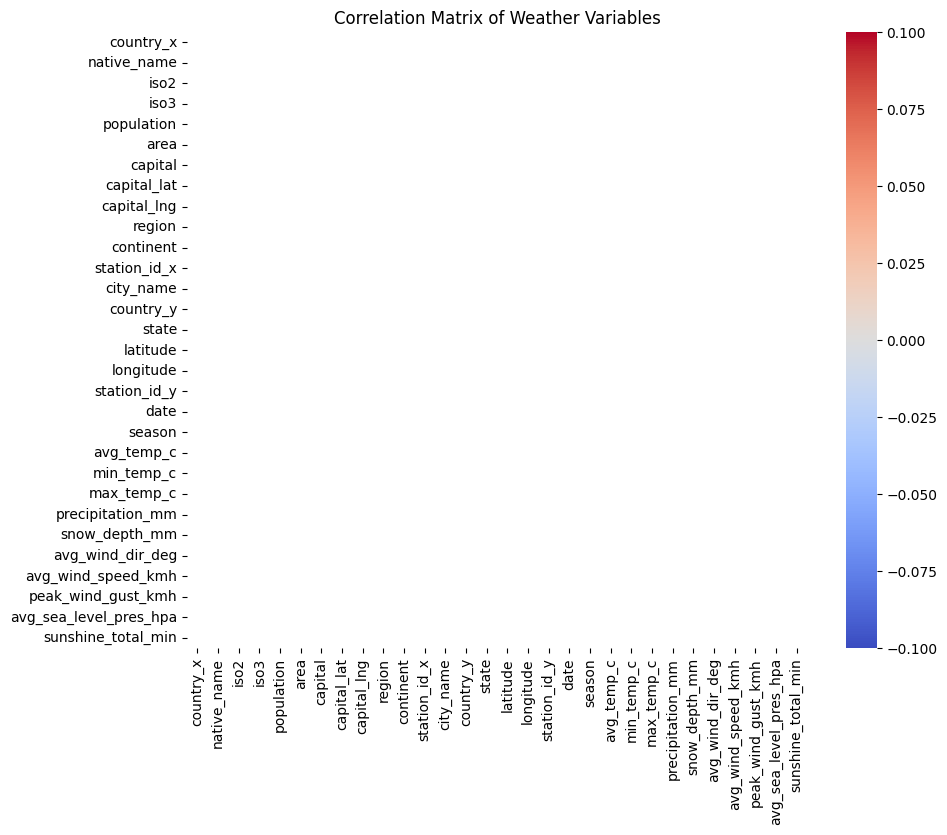

In [28]:
weather_numeric = weather.apply(pd.to_numeric, errors='coerce')
weather_numeric = weather_numeric.dropna()

correlation_matrix = weather_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Weather Variables')
plt.show()

# Geospatial Visualization

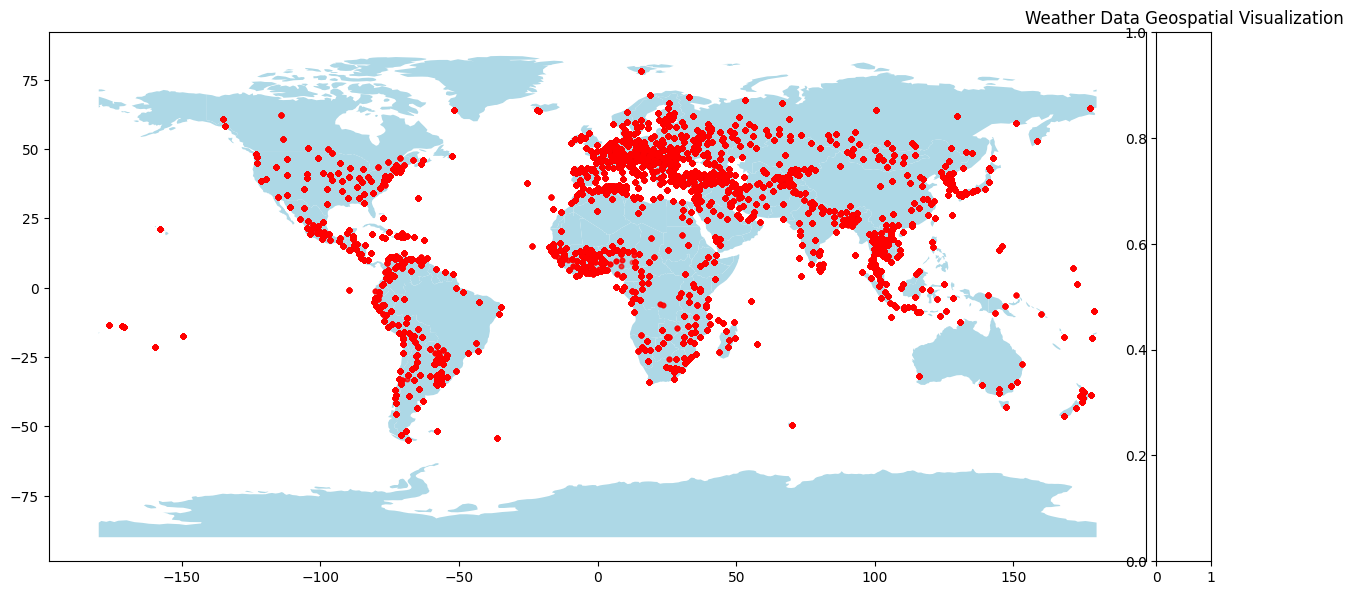

In [29]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming  latitude and longitude columns in the dataset
geometry = gpd.points_from_xy(weather['longitude'], weather['latitude'])
geo_df = gpd.GeoDataFrame(weather, geometry=geometry)

# Plotting on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(ax=ax, color='lightblue')
geo_df.plot(ax=ax, markersize=10, color='red', alpha=0.5)
plt.title('Weather Data Geospatial Visualization')
plt.show()


Mean Squared Error: 2210.3690939479734
R-squared: 0.21979101924649158


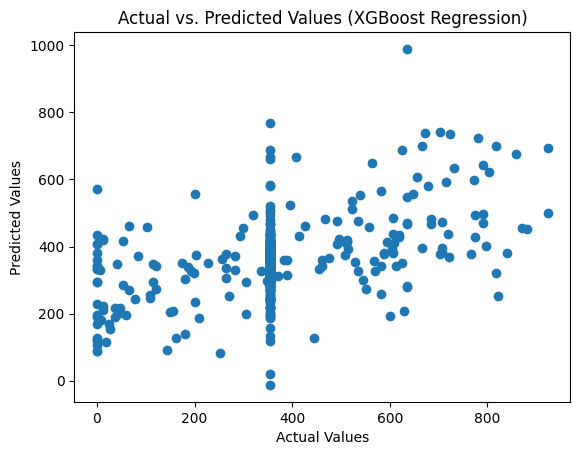

In [30]:
X = weather.iloc[:, :-1]  # Features
y = weather.iloc[:, -1]   # Target variable

# Drop non-numeric columns
non_numeric_columns = ['iso3', 'capital', 'region', 'continent', 'station_id_x', 'city_name',
                       'country_y', 'state', 'station_id_y', 'date', 'season']
X = X.drop(columns=non_numeric_columns)

# Specify the categorical columns
categorical_columns = ['country_x', 'native_name', 'iso2']

# One-hot encode the categorical columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Create an XGBoost model
model = XGBRegressor(n_estimators=100, random_state=42)

# Adjust test size if needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (XGBoost Regression)')
plt.show()

In [31]:
# Split the data into numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor_with_imputer = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the SVR model
model = SVR(kernel='linear')

# Bundle preprocessing and modeling code in a pipeline
pipeline_svr_imputed = Pipeline([
    ('preprocessor', preprocessor_with_imputer),
    ('model', model)
])

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the SVR model with imputed data
pipeline_svr_imputed.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr_imputed = pipeline_svr_imputed.predict(X_test)


In [32]:
# Import necessary metrics
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred_svr_imputed = pipeline_svr_imputed.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_svr_imputed)
r2 = r2_score(y_test, y_pred_svr_imputed)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 2971.1683584273237
R-squared: 0.0001519569368031437


# Actual vs Predicted values Random Forest

Mean Squared Error: 2055.554225506476
R-squared: 0.27443707408093


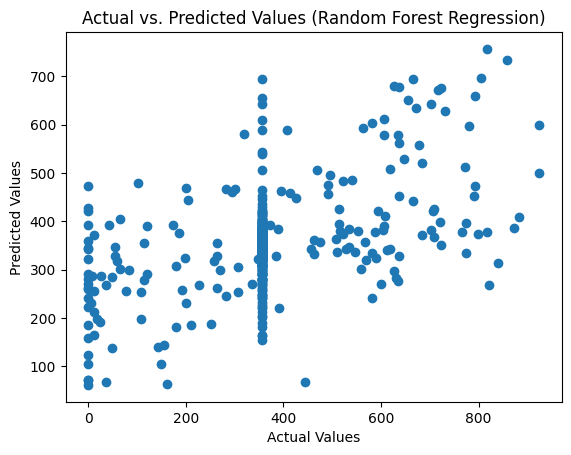

In [33]:
X = weather.iloc[:, :-1]  # Features
y = weather.iloc[:, -1]   # Target variable

# Drop non-numeric columns
non_numeric_columns = ['iso3', 'capital', 'region', 'continent', 'station_id_x', 'city_name',
                       'country_y', 'state', 'station_id_y', 'date', 'season']
X = X.drop(columns=non_numeric_columns)

# Specify the categorical columns
categorical_columns = ['country_x', 'native_name', 'iso2']

# One-hot encode the categorical columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies as well
X = imputer.fit_transform(X)

# Adjust test size if needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Random Forest Regression)')
plt.show()

# K-Neighbors Regressor

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Create an imputer object
imputer = SimpleImputer(strategy='mean')  

# Fit and transform the imputer on the training data
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)

# Transform the test data using the same imputer
X_test_scaled_imputed = imputer.transform(X_test_scaled)

# Define the value of k
k = 5  

knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train_scaled_imputed, y_train)

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test_scaled_imputed)

# Evaluate the model (for regression, use metrics like Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Check for NaN values in the imputed datasets
print("NaN values in X_train_scaled_imputed:", np.isnan(X_train_scaled_imputed).sum())
print("NaN values in X_test_scaled_imputed:", np.isnan(X_test_scaled_imputed).sum())

knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train_scaled_imputed, y_train)

y_pred = knn_regressor.predict(X_test_scaled_imputed)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2647.622535658857
NaN values in X_train_scaled_imputed: 0
NaN values in X_test_scaled_imputed: 0
Mean Squared Error: 2647.622535658857


# 